In [1]:
# !pip install --upgrade matplotlib seaborn --quiet

In [2]:
# import matplotlib
# print("Matplotlib version", matplotlib.__version__)

In [3]:
#import needed libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm

import sklearn 
from datetime import datetime
import seaborn as sns
import math

In [4]:
df = pd.read_csv('Crime.csv')
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,04/11/2021 12:00:00 AM,11/07/2020 12:00:00 AM,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 12:00:00 AM,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/03/2020 12:00:00 AM,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1004991 non-null  int64  
 1   Date Rptd       1004991 non-null  object 
 2   DATE OCC        1004991 non-null  object 
 3   TIME OCC        1004991 non-null  int64  
 4   AREA            1004991 non-null  int64  
 5   AREA NAME       1004991 non-null  object 
 6   Rpt Dist No     1004991 non-null  int64  
 7   Part 1-2        1004991 non-null  int64  
 8   Crm Cd          1004991 non-null  int64  
 9   Crm Cd Desc     1004991 non-null  object 
 10  Mocodes         853372 non-null   object 
 11  Vict Age        1004991 non-null  int64  
 12  Vict Sex        860347 non-null   object 
 13  Vict Descent    860335 non-null   object 
 14  Premis Cd       1004975 non-null  float64
 15  Premis Desc     1004403 non-null  object 
 16  Weapon Used Cd  327247 non-null   fl

In [6]:
df.columns = [c.strip() for c in df.columns]

rename_map = {
    "Date Rptd": "Date_Reported",
    "DATE OCC": "Date_Occurred",
    "TIME OCC": "Time_Occurred",
    "AREA NAME": "Area_Name",
    "Rpt Dist No": "Reported_District_Num",
    "Part 1-2": "Part_1_2",
    "Crm Cd": "Crime_Code",
    "Crm Cd Desc": "Crime_Code_Desc",
    "Mocodes": "Mocodes",
    "Premis Desc": "Premis_Desc",
    "Weapon Desc": "Weapon_Desc",
    "Status Desc": "Status_Desc",
    "Vict Age": "Victim_Age",
    "Vict Sex": "Victim_Sex",
    "Vict Descent": "Victim_Descent",
    "LOCATION": "Location",
    "Cross Street": "Cross_Street",
    "LAT": "Latitude",
    "LON": "Longitude",
    "Crm Cd 1": "Crime_Cd_1",
    "Crm Cd 2": "Crime_Cd_2",
    "Crm Cd 3": "Crime_Cd_3",
    "Crm Cd 4": "Crim_Cd_4",
}

df = df.rename(columns  = {k: v for k, v in rename_map.items() if k in df.columns})

In [7]:
# Convert to datetime
date_format = "%m/%d/%Y %I:%M:%S %p"  

df['Date_Occurred'] = pd.to_datetime(df['Date_Occurred'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['Date_Reported'] = pd.to_datetime(df['Date_Reported'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

In [8]:
print(df['Date_Occurred'].head())
print("NaTs", df['Date_Occurred'].isna().sum())
print("dtype:", df['Date_Occurred'].dtype)

0   2020-11-07
1   2020-10-18
2   2020-10-30
3   2020-12-24
4   2020-09-29
Name: Date_Occurred, dtype: datetime64[ns]
NaTs 0
dtype: datetime64[ns]


In [9]:
# Convert 'Date_Occurred' to datetime
df['Date_Occurred'] = pd.to_datetime(df['Date_Occurred'], errors='coerce')

# Extract date features
df['YEAR'] = df['Date_Occurred'].dt.year
df['MONTH'] = df['Date_Occurred'].dt.month
df['DAY_OF_WEEK'] = df['Date_Occurred'].dt.day_name()

# Ensure 'Time_Occurred' is string and pad to 4 digits (HHMM)
df['Time_Occurred'] = df['Time_Occurred'].astype(str).str.zfill(4)

# Filter out default 12:00 PM entries
df = df[df['Time_Occurred'] != '1200']

# Extract HOUR and MINUTE from Time_Occurred
df['HOUR'] = df['Time_Occurred'].str[:2].astype(int)
df['MINUTE'] = df['Time_Occurred'].str[2:4].astype(int)

# Set SECOND to 0 (dataset does not have seconds)
df['SECOND'] = 0

# Optional: check result
print(df[['Date_Occurred', 'Time_Occurred', 'HOUR', 'MINUTE', 'SECOND']].head())

  Date_Occurred Time_Occurred  HOUR  MINUTE  SECOND
0    2020-11-07          0845     8      45       0
1    2020-10-18          1845    18      45       0
2    2020-10-30          1240    12      40       0
3    2020-12-24          1310    13      10       0
4    2020-09-29          1830    18      30       0


### Why We Filtered Out the 12:00 PM Entries
In the LA crime Dataset, the 'Time_Occurred' column records the time at which each crime took place. However, many entries have a time of exactly '12:00 PM' (1200 in HHMM format), which is often a default placeholder used when the actual time was not recorded. Including these default values in our analysis would create an artificial spike at the 12th hour, misrepresenting the true distribution of crimes throughout the day. To ensure that our visualization and statistical summaries accurately reflect real crime activity, we filtered out these '12:00 PM' placeholder entries while keeping the times in the 12th hour (e.g., 12:15 PM, 12:30 PM). This approach preserves legitimate data while removing artificially inflated counts that could skew our results.

In [10]:
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

df["Season"] = df["MONTH"].apply(get_season)
df["Season"].value_counts()

Season
Winter    248142
Spring    245271
Summer    240560
Fall      235818
Name: count, dtype: int64

In [11]:
df.columns.tolist()

['DR_NO',
 'Date_Reported',
 'Date_Occurred',
 'Time_Occurred',
 'AREA',
 'Area_Name',
 'Reported_District_Num',
 'Part_1_2',
 'Crime_Code',
 'Crime_Code_Desc',
 'Mocodes',
 'Victim_Age',
 'Victim_Sex',
 'Victim_Descent',
 'Premis Cd',
 'Premis_Desc',
 'Weapon Used Cd',
 'Weapon_Desc',
 'Status',
 'Status_Desc',
 'Crime_Cd_1',
 'Crime_Cd_2',
 'Crime_Cd_3',
 'Crim_Cd_4',
 'Location',
 'Cross_Street',
 'Latitude',
 'Longitude',
 'YEAR',
 'MONTH',
 'DAY_OF_WEEK',
 'HOUR',
 'MINUTE',
 'SECOND',
 'Season']

In [12]:
df = df[(df['Latitude'] != 0) & (df['Longitude'] != 0)]
df = df.dropna(subset=['Latitude', 'Longitude'])

df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

In [13]:
df.isnull().sum().sort_values(ascending=False).head(10)

Crim_Cd_4         967539
Crime_Cd_3        965352
Crime_Cd_2        900349
Cross_Street      817124
Weapon Used Cd    648459
Weapon_Desc       648459
Mocodes           144932
Victim_Descent    138437
Victim_Sex        138425
Premis_Desc          583
dtype: int64

In [14]:
threshold = len(df) * 0.8  # keep columns with at least 80% non-null values
df = df.dropna(thresh=threshold, axis=1)

In [15]:
text_cols = ['Crime_Code_Desc', 'Premis_Desc', 'Area_Name']
for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.title()

In [16]:
df["Crime_Code_Desc"].unique()

array(['Theft Of Identity',
       'Assault With Deadly Weapon, Aggravated Assault',
       'Theft From Motor Vehicle - Grand ($950.01 And Over)',
       'Theft From Motor Vehicle - Petty ($950 & Under)',
       'Crm Agnst Chld (13 Or Under) (14-15 & Susp 10 Yrs Older)',
       'Vehicle - Stolen', 'Burglary', 'Burglary From Vehicle',
       'Theft Plain - Petty ($950 & Under)',
       'Intimate Partner - Simple Assault', 'Battery - Simple Assault',
       'Vandalism - Misdeameanor ($399 Or Under)',
       'Vehicle - Attempt Stolen',
       'Vandalism - Felony ($400 & Over, All Church Vandalisms)',
       'Robbery', 'Firearms Restraining Order (Firearms Ro)',
       'Bike - Stolen', 'Embezzlement, Grand Theft ($950.01 & Over)',
       'Child Abuse (Physical) - Simple Assault',
       'Criminal Threats - No Weapon Displayed',
       'Theft-Grand ($950.01 & Over)Excpt,Guns,Fowl,Livestk,Prod',
       'Battery With Sexual Contact',
       'Letters, Lewd  -  Telephone Calls, Lewd',
       'V

In [17]:
def Is_Violent(desc: str) -> bool: 
    if not isinstance(desc, str): 
        return False
    d = desc.upper()
    patterns = [
        # Homicides 
        "Homicide","Criminal Homicide", "Manslaughter", "Murder", "Lynching"

        # Sex Crimes
        "Rape", "Sexual Assault", "Sodomy", "Forcible Rape",
        "Rape, Attempted", "Rape, Forcible", "Oral Copulation",
        "Sexual Penetration W/Foreign Object", "Battery With Sexual Contact",
        "Lewd", "Incest", "Sex,Unlawful", "Beastiality",
        "Child Pornography", "Human Trafficking - Commercial Sex Acts",
        "Human Trafficking - Involuntary Servitude", "Pandering", "Pimping",

        # Robbery
        "Robbery", "Attempted Robbery", "Theft, Person", "Purse Snatching",
        "Purse Snatching - Attempt", "Theft From Person - Attempt", "Burglary" ,

        # Assault
        "Assault", "Battery", "Battery Police", "Assault With Deadly Weapon",
        "Aggravated Assault", "Intimate Partner - Aggravated Assault",
        "Child Abuse (Physical)", "Battery On A Firefighter",
        "Other Assault", "Lynching - Attempted", "Brandish Weapon",
        "Child Abuse (Physical) - Simple Assault",
        "Assault With Deadly Weapon On Police Officer",

         # Kidnapping / False Imprisonment
        "Kidnapping", "Kidnapping - Grand Attempt", "False Imprisonment",

        # Weapons / Shooting / Arson
        "Shooting", "Discharge Firearms/Shots Fired", "Arson",
        "Shots Fired At Moving Vehicle", "Shots Fired At Inhabited Dwelling",
        "Weapons Possession/Bombing", "Bomb Scare", "Explosive",
        "Throwing Object At Moving Vehicle",

        # Threats / Extortion / Terror
        "Criminal Threats", "Extortion", "Terrorist Threat",
        "Threatening Phone Calls", "Bribery",

        # Domestic / Intimate Partner Violence
        "Intimate Partner", "Violation Of Restraining Order",
        "Violation Of Temporary Restraining Order",

        # Endangerment / Violence Toward Children Or Animals
        "Child Neglect", "Child Stealing", "Cruelty To Animals",

        # Other Severe Crimes Involving Force Or Threat
        "Stalking", "Lynching", "Conspiracy", "Riot",
        "Resisting Arrest", "Discharge Firearms", "Train Wrecking",
        "Battery - Simple Assault"
    ]
    return any(p.upper() in d for p in patterns)

if "Crime_Code_Desc" in df.columns:
    df["Is_Violent"] = df["Crime_Code_Desc"].apply(Is_Violent)

else:
    df["Is_Violent"] = False

print(df[["Crime_Code_Desc", "Is_Violent"]].head(20))

                                      Crime_Code_Desc  Is_Violent
0                                   Theft Of Identity       False
1      Assault With Deadly Weapon, Aggravated Assault        True
2                                   Theft Of Identity       False
3   Theft From Motor Vehicle - Grand ($950.01 And ...       False
4     Theft From Motor Vehicle - Petty ($950 & Under)       False
5                                   Theft Of Identity       False
6                                   Theft Of Identity       False
7   Crm Agnst Chld (13 Or Under) (14-15 & Susp 10 ...       False
9                                   Theft Of Identity       False
10  Crm Agnst Chld (13 Or Under) (14-15 & Susp 10 ...       False
11                                  Theft Of Identity       False
12                                   Vehicle - Stolen       False
13                                           Burglary        True
14                              Burglary From Vehicle        True
15        

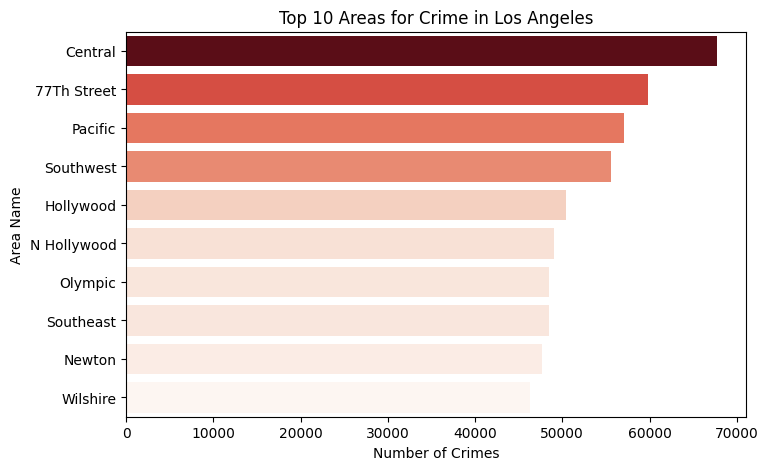

In [18]:
top_areas = df['Area_Name'].value_counts().head(10)
plt.figure(figsize=(8,5))

sns.barplot(
    y=top_areas.index,
    x=top_areas.values,
    hue=top_areas.values,
    palette='Reds',
    dodge=False,
    legend=False
)
plt.title("Top 10 Areas for Crime in Los Angeles")
plt.xlabel("Number of Crimes")
plt.ylabel("Area Name")
plt.show()

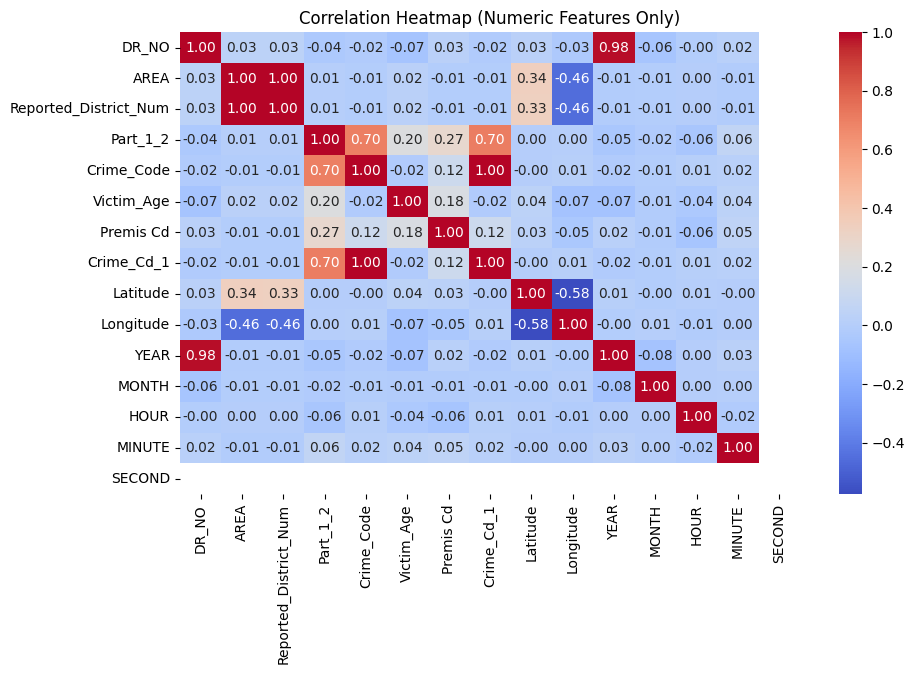

In [19]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

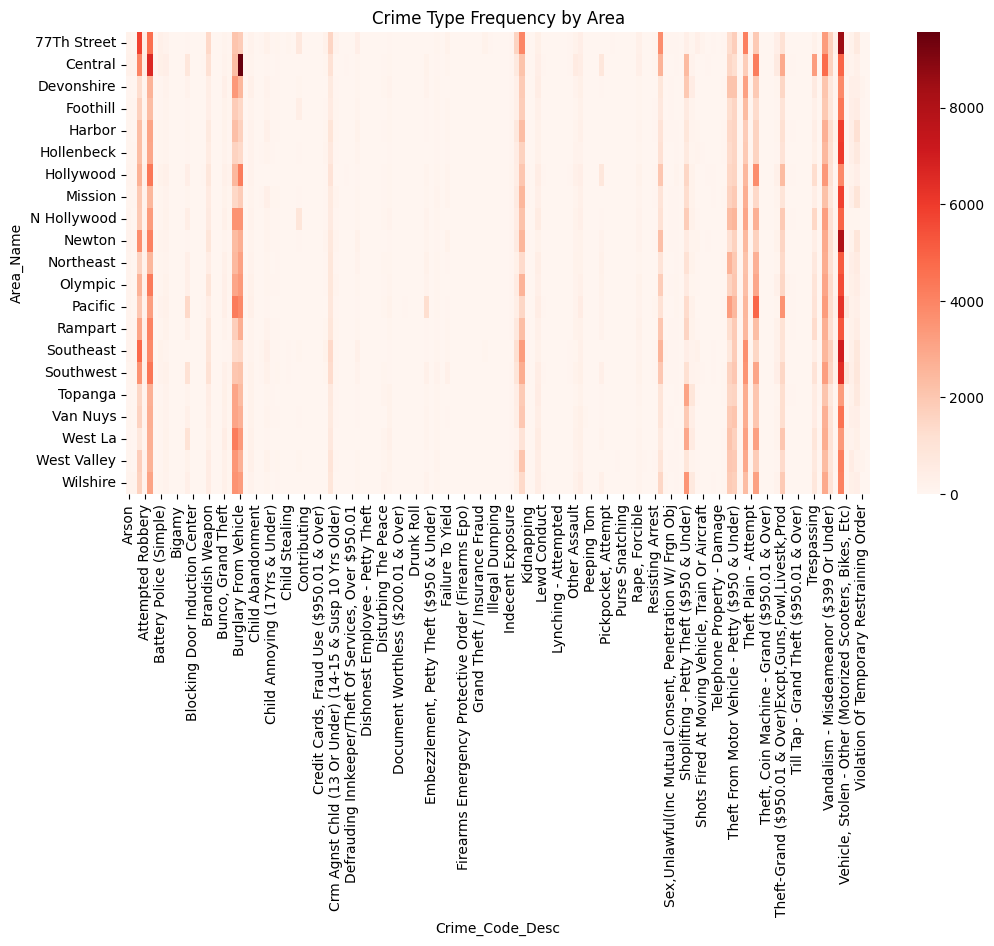

In [20]:
crime_area = pd.crosstab(df['Area_Name'], df['Crime_Code_Desc'])
plt.figure(figsize=(12,6))
sns.heatmap(crime_area, cmap='Reds')
plt.title("Crime Type Frequency by Area")
plt.show()

In [21]:
#Extract time components
df['Year'] = df['Date_Occurred'].dt.year
df['Month'] = df['Date_Occurred'].dt.month
df['YearMonth'] = df['Date_Occurred'].dt.to_period('M')

#Group by month-year and count violent crimes
monthly_violent = (
    df[df['Is_Violent']]
    .groupby('YearMonth')
    .size()
    .reset_index(name='Violent_Crime_Count')
)

#Convert period index to timestamp for playing
monthly_violent['YearMonth'] = monthly_violent['YearMonth'].dt.to_timestamp()

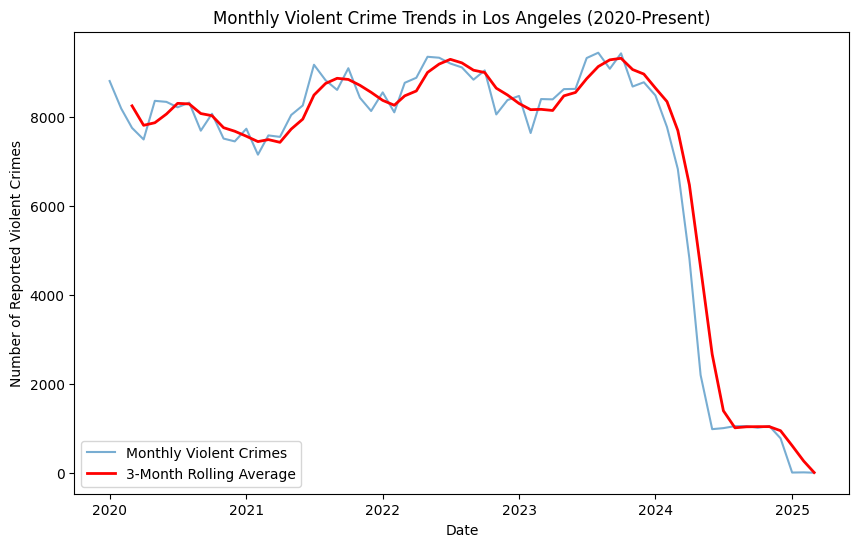

In [22]:
#Apply 3-month rolling average
monthly_violent['Rolling_3M'] = monthly_violent['Violent_Crime_Count'].rolling(window=3).mean()

#Plot
plt.figure(figsize=(10,6))
plt.plot(monthly_violent['YearMonth'], monthly_violent['Violent_Crime_Count'], label='Monthly Violent Crimes', alpha=0.6)
plt.plot(monthly_violent['YearMonth'], monthly_violent['Rolling_3M'], label='3-Month Rolling Average', color='red', linewidth=2)
plt.title("Monthly Violent Crime Trends in Los Angeles (2020-Present)")
plt.xlabel("Date")
plt.ylabel("Number of Reported Violent Crimes")
plt.legend()
plt.show()

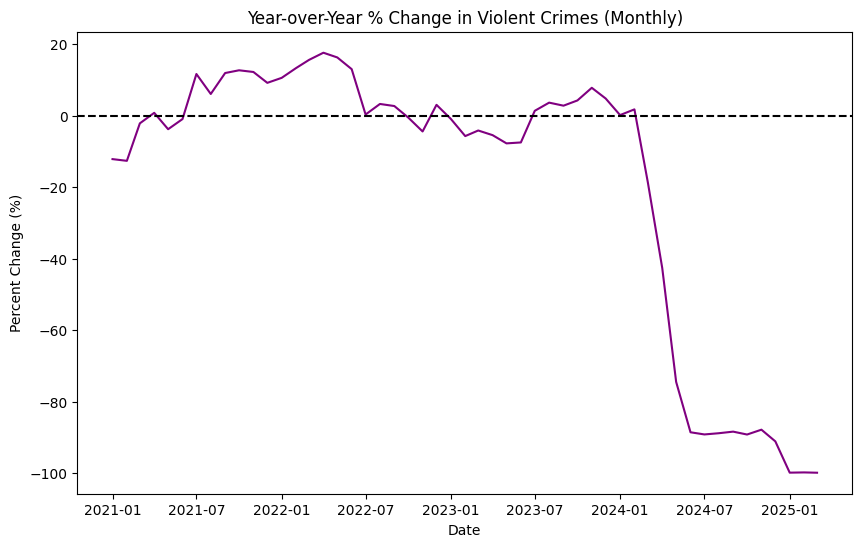

In [23]:
#Calculate Year-over-Year change
monthly_violent['YoY_Change']=monthly_violent['Violent_Crime_Count'].pct_change(periods=12) * 100

plt.figure(figsize=(10,6))
plt.plot(monthly_violent['YearMonth'], monthly_violent['YoY_Change'], color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.title("Year-over-Year % Change in Violent Crimes (Monthly)")
plt.xlabel("Date")
plt.ylabel("Percent Change (%)")
plt.show()

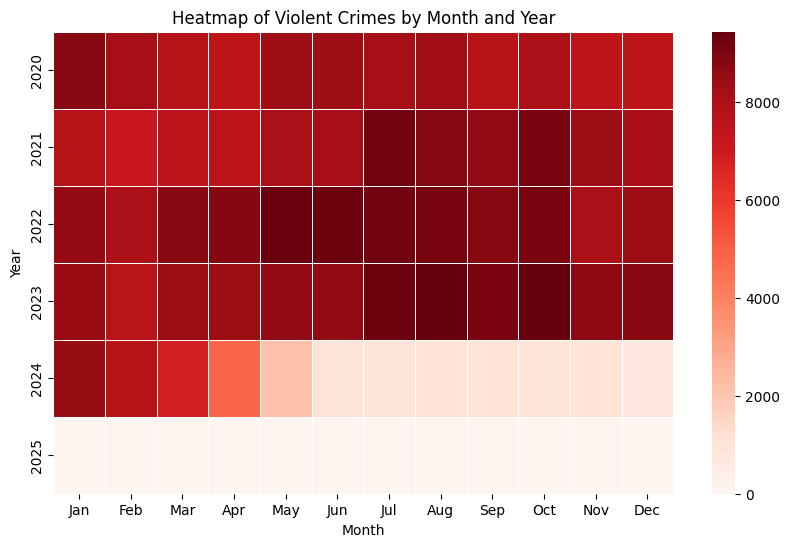

In [24]:
#Heatmap of Violent Crime by Month and Year

df['Month_Name'] = df['Date_Occurred'].dt.strftime('%b')

heat_data = (
    df[df['Is_Violent']]
    .groupby(['Year', 'Month_Name'])
    .size()
    .unstack(fill_value=0)
)

import calendar
month_order = list(calendar.month_abbr)[1:]
heat_data = heat_data[month_order]

plt.figure(figsize=(10,6))
sns.heatmap(heat_data, cmap='Reds', linewidths=0.5)
plt.title("Heatmap of Violent Crimes by Month and Year")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

Bin edges: [  0.   6.  12.  18.  24.  30.  36.  42.  48.  54.  60.  66.  72.  78.
  84.  90.  96. 102. 108. 114. 120.]
Bin counts: [261740   3981  17805  74855 115207 122009  96187  74173  64219  51597
  39259  23472  12899   6147   2480    900    555      0      0      1]


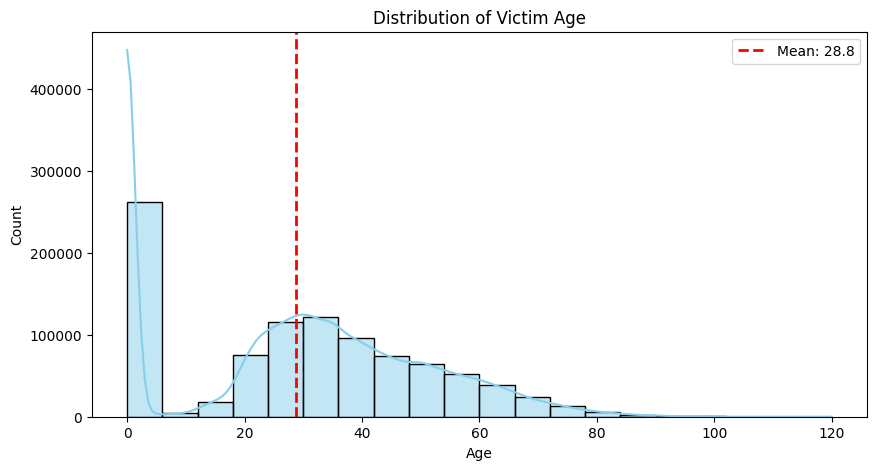

In [25]:
df = df[df['Victim_Age'] >= 0]

ages = df['Victim_Age'].dropna()

counts, bins = np.histogram(ages, bins=20)
print("Bin edges:", bins)
print("Bin counts:", counts)

plt.figure(figsize=(10,5))
sns.histplot(ages, bins=20, kde=True, color='skyblue')

mean_age = ages.mean()
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_age:.1f}')

plt.title('Distribution of Victim Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

plt.show()

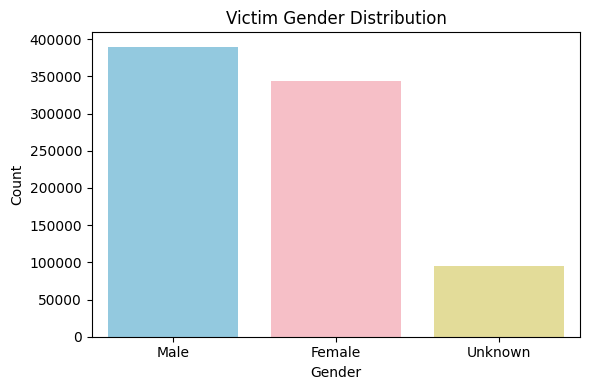

In [26]:
df['Victim_Sex_Label'] = df['Victim_Sex'].map({
    'M': 'Male',
    'F': 'Female',
    'X': 'Unknown'
})

custom_palette = {
    'Male': 'skyblue',      
    'Female': 'lightpink',  
    'Unknown': 'khaki'
}

plt.figure(figsize=(6,4))
sns.countplot(
    data=df,
    x='Victim_Sex_Label',
    hue='Victim_Sex_Label',
    palette=custom_palette,
    order=['Male', 'Female', 'Unknown'],
    legend=False  
)

plt.title('Victim Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

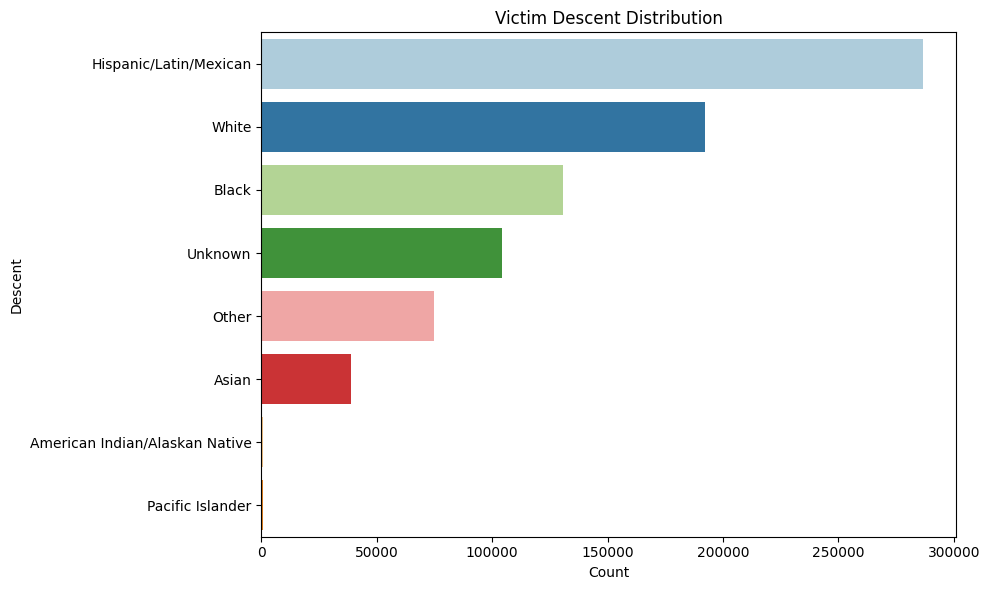

In [27]:
descent_map = {
    'A': 'Asian',
    'B': 'Black',
    'C': 'Asian',
    'D': 'Asian',
    'F': 'Asian',
    'G': 'Pacific Islander',
    'H': 'Hispanic/Latin/Mexican',
    'I': 'American Indian/Alaskan Native',
    'J': 'Asian',
    'K': 'Asian',
    'L': 'Asian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Pacific Islander',
    'U': 'Pacific Islander',
    'V': 'Asian',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian'
}

df['Victim_Descent_Label'] = df['Victim_Descent'].map(descent_map)

ethnicity_counts = df['Victim_Descent_Label'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(
    x=ethnicity_counts.values,
    y=ethnicity_counts.index,
    hue=ethnicity_counts.index,
    palette='Paired',
    dodge=False,
    legend=False
)
plt.title('Victim Descent Distribution')
plt.xlabel('Count')
plt.ylabel('Descent')
plt.tight_layout()
plt.show()


In [28]:
gender_map = {'M': 'Male', 'F': 'Female', 'X': 'Unknown'}
df['Victim_Sex_Label'] = df['Victim_Sex'].map(gender_map).fillna('Unknown')

descent_group_map = {
    # Asian group
    'A': 'Asian', 'C': 'Asian', 'D': 'Asian', 'F': 'Asian',
    'J': 'Asian', 'K': 'Asian', 'L': 'Asian', 'V': 'Asian', 'Z': 'Asian',
    # Pacific Islander group
    'G': 'Pacific Islander', 'P': 'Pacific Islander', 'S': 'Pacific Islander', 'U': 'Pacific Islander',
    # Others as specified
    'B': 'Black',
    'H': 'Hispanic',
    'I': 'American Indian/Native Alaskan',
    'O': 'Other',
    'W': 'White', 
    'X': 'Unknown'
}
df['Victim_Descent_Group'] = df['Victim_Descent'].map(lambda x: descent_group_map.get(str(x), 'Other')).fillna('Unknown')

age_bins   = [0, 17, 25, 40, 60, 100]
age_labels = ['0-17','18-25','26-40','41-60','60+']
df['Age_Group'] = pd.cut(df['Victim_Age'], bins=age_bins, labels=age_labels, include_lowest=True, right=True)

gender_order   = ['Male', 'Female', 'Unknown']
ethnicity_order = [
    'Asian', 'Black', 'Pacific Islander', 'Hispanic',
    'American Indian/Native Alaskan', 'White', 'Other', 'Unknown'
]

df['Victim_Sex_Label'] = pd.Categorical(df['Victim_Sex_Label'], categories=gender_order, ordered=True)
df['Victim_Descent_Group'] = pd.Categorical(df['Victim_Descent_Group'], categories=ethnicity_order, ordered=True)
df['Age_Group'] = pd.Categorical(df['Age_Group'], categories=age_labels, ordered=True)

heatmap_counts = pd.crosstab(df['Victim_Descent_Group'], df['Victim_Sex_Label']).reindex(index=ethnicity_order, columns=gender_order)
heatmap_percent = heatmap_counts.div(heatmap_counts.sum(axis=1), axis=0) * 100

age_gender_percent = (
    pd.crosstab(df['Age_Group'], df['Victim_Sex_Label'], normalize='index') * 100
).reindex(index=age_labels, columns=gender_order)

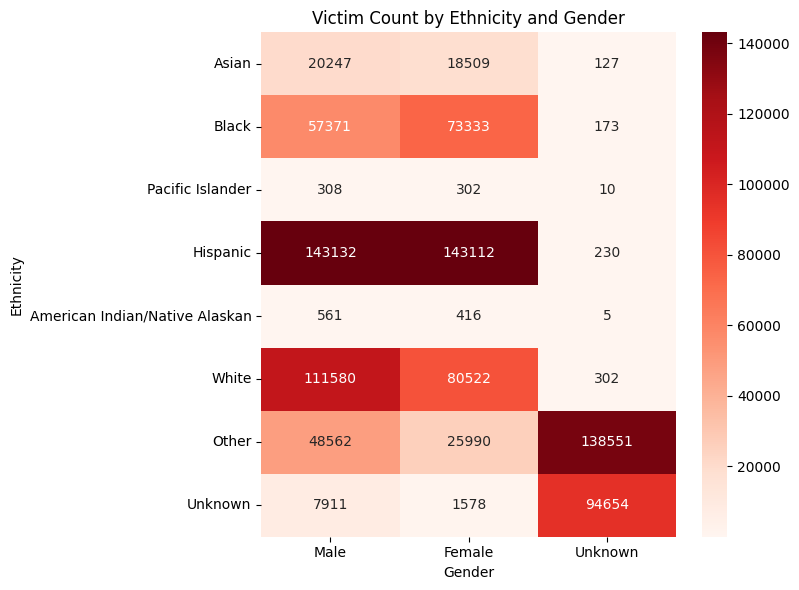

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_counts, annot=True, fmt='d', cmap='Reds', cbar=True)
plt.title('Victim Count by Ethnicity and Gender')
plt.xlabel('Gender')
plt.ylabel('Ethnicity')
plt.tight_layout()
plt.show()

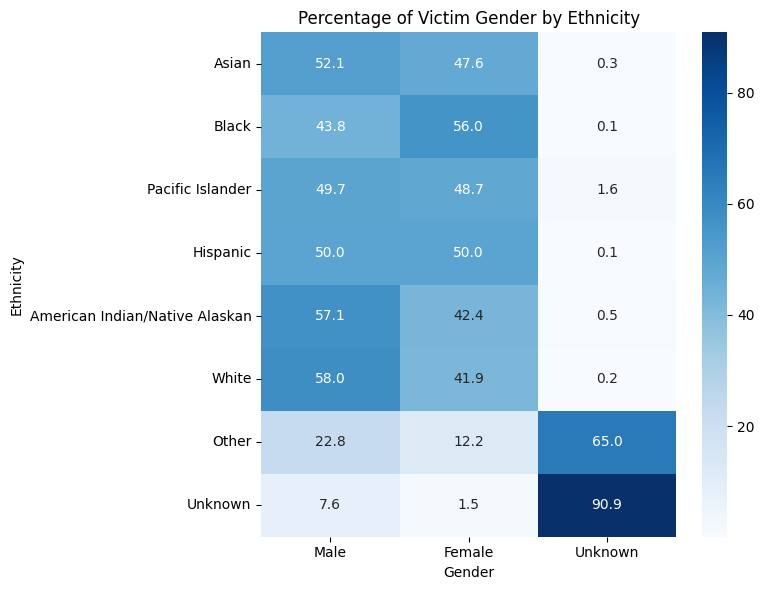

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_percent, annot=True, fmt='.1f', cmap='Blues', cbar=True)
plt.title('Percentage of Victim Gender by Ethnicity')
plt.xlabel('Gender')
plt.ylabel('Ethnicity')
plt.tight_layout()
plt.show()

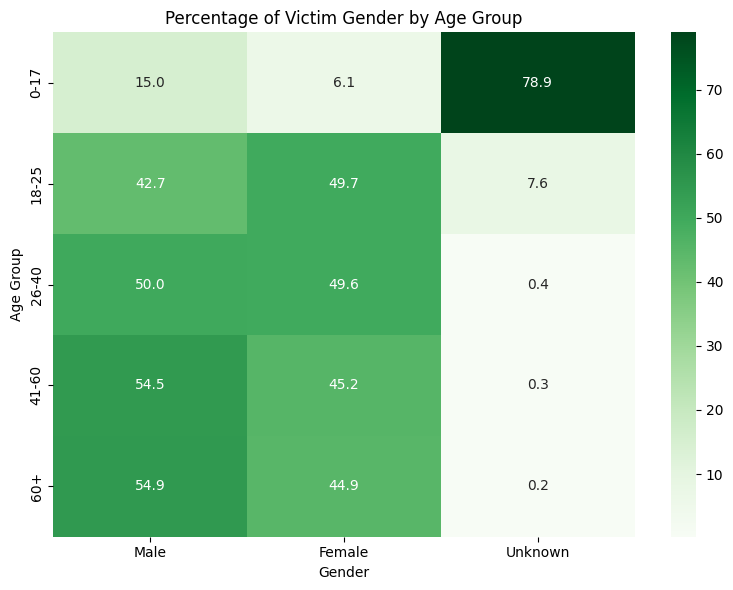

In [31]:
plt.figure(figsize=(8,6))
sns.heatmap(age_gender_percent, annot=True, fmt='.1f', cmap='Greens', cbar=True)
plt.title('Percentage of Victim Gender by Age Group')
plt.xlabel('Gender')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967486 entries, 0 to 1004990
Data columns (total 38 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   DR_NO                  967486 non-null  int64         
 1   Date_Reported          967486 non-null  datetime64[ns]
 2   Date_Occurred          967486 non-null  datetime64[ns]
 3   Time_Occurred          967486 non-null  object        
 4   AREA                   967486 non-null  int64         
 5   Area_Name              967486 non-null  object        
 6   Reported_District_Num  967486 non-null  int64         
 7   Part_1_2               967486 non-null  int64         
 8   Crime_Code             967486 non-null  int64         
 9   Crime_Code_Desc        967486 non-null  object        
 10  Mocodes                822558 non-null  object        
 11  Victim_Age             967486 non-null  int64         
 12  Victim_Sex             829061 non-null  object  

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0c4bf00e-decb-40b9-aec2-e6b1b5357766' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>